# Aula 06 - Dados nD - netCDF

Nesta aula trabalhamos com dados 3 ou 4 D em formato netCDF. 
Utilizamos o pacote https://docs.xarray.dev/en/stable/ e  trabalharemos com os dados da plataforma
https://disc.gsfc.nasa.gov/

## Baixando os dados do GESDISC
- Crie um login para você
- Digite uma palavra-chave que descreva o dado que desejar
- Baixe o dado para um determinado período
- https://disc.gsfc.nasa.gov/datasets/MERRA2_CNN_HAQAST_PM25_1/summary?keywords=air%20quality
- https://github.com/nasa/gesdisc-tutorials/blob/main/notebooks/How_to_Access_GES_DISC_Data_Using_Python.ipynb
- 



In [26]:
# Caminhos para a pasta de dados
import os 

# Pasta atual
pastaAtual = os.getcwd()
print(pastaAtual)

# Pasta de dados
pastaDados = r'C:\Users\Leonardo.Hoinaski\Documents\ENS410064\2024\dados'
listaDados = os.listdir(pastaDados)

# Listando arquivos
print(listaDados)

# Selecionando arquivos do MERRA2
prefixed = [filename for filename in os.listdir(pastaDados) if filename.startswith("MERRA2")]
print(prefixed)

C:\Users\Leonardo.Hoinaski\Documents\ENS410064\2024\dados
['1728675725931.csv', 'BR_Pais_2022', 'BR_Pais_2022.zip', 'BR_UF_2022', 'BR_UF_2022.zip', 'Deg2UTM.csv', 'EZ_AERMOD_leohoinaski_2024-11-14', 'EZ_AERMOD_leohoinaski_2024-11-14.zip', 'FINNv2.5.1_modvrs_nrt_GEOSCHEM_20240708.txt', 'MERRA2_HAQAST_CNN_L4_V1.20240505.nc4', 'MERRA2_HAQAST_CNN_L4_V1.20240506.nc4', 'metar_FORT_2023.csv', 'metar_SBFL_2022.csv', 'metar_SBFL_2023.csv', 'metar_SBFL_2024.csv', 'SC_distritos_CD2022', 'SC_distritos_CD2022.zip', 'UPPERAIR(1).UA']
['MERRA2_HAQAST_CNN_L4_V1.20240505.nc4', 'MERRA2_HAQAST_CNN_L4_V1.20240506.nc4']


In [27]:
# Abrir arquivos do MERRA utilizando o netCDF4
# pip install netCDF4 dask h5netcdf bottleneck
#import xarray as xr # não funcionou no meu PC. Precisa instalar algumas dependências. 
import netCDF4 as nc

# Abre o primeiro arquivo da lista
dataset = nc.Dataset(pastaDados+'\\'+prefixed[0])
print(dataset)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Comment: filename: MERRA2_HAQAST_CNN_L4_V1_20240505.nc4
    Filename: MERRA2_HAQAST_CNN_L4_V1_20240505.nc4
    Conventions: CF-1
    Institution: NASA Goddard Space Flight Center
    References: http://gmao.gsfc.nasa.gov ; https://doi.org/10.4209/aaqr.210105 ; https://doi.org/10.1029/2022EA002375
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: V1
    TemporalRange: 2000-01-01 -> 2024-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: MERRA2_CNN_HAQAST_PM25
    GranuleID: MERRA2_HAQAST_CNN_L4_V1_20240505.nc4
    ProductionDateTime: 2024-06-25T01:34:15.870456Z
    LongName: MERRA2_CNN_HAQAST bias corrected global hourly surface total PM2.5 mass concentration V1.0
    title: MERRA2_CNN_HAQAST bias corrected global hourly surface total PM2.5 mass concentration V1.0
    SouthernmostLatitude: -90.0
    NorthernmostLatitude: 90.0
    WesternmostLongitude: -180.0
  

In [29]:
# Acessando o dado de PM25

pm25 = dataset['MERRA2_CNN_Surface_PM25'][:]
print(pm25.shape) #(time,lat,lon)

(24, 361, 576)


35.0
-55.0


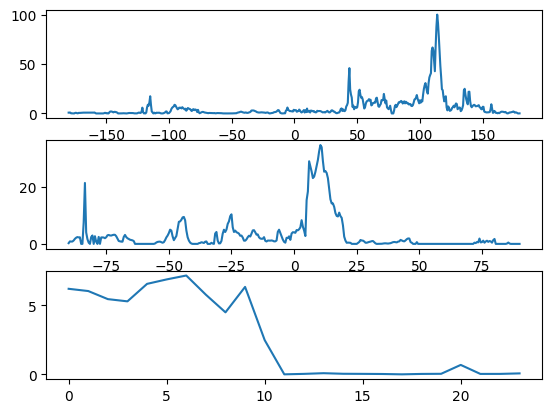

In [40]:
# Plotando o dado 1D 
import matplotlib.pyplot as plt

fig,ax = plt.subplots(3)

# Para o tempo - time = 0 em y = 250
ax[0].plot(dataset['lon'][:],pm25[0,250,:])
print(dataset['lat'][250])

# Para o tempo - time = 0 em x = 200
ax[1].plot(dataset['lat'][:],pm25[0,:,200])
print(dataset['lon'][200])

# Para todo o tempo em um ponto específico
ax[2].plot(dataset['time'][:],pm25[:,250,100])

0   -73.99045
Name: minx, dtype: float64


(-33.7511779939999, 5.27184107700003)

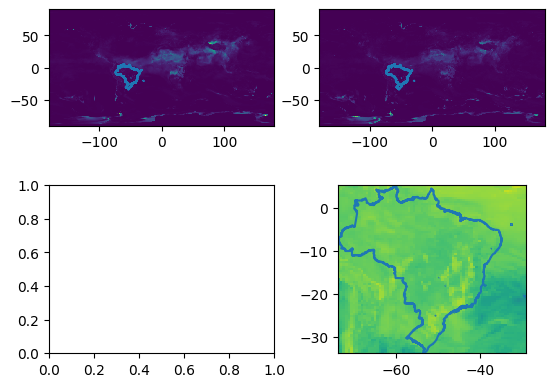

In [53]:
# Operações com o numpy
import numpy as np
import geopandas as gpd
import matplotlib

br = gpd.read_file(r"C:\Users\Leonardo.Hoinaski\Documents\ENS410064\2024\dados\BR_Pais_2022\BR_Pais_2022.shp")

fig,ax = plt.subplots(2,2)

# média do dia em todos os locais
ax[0,0].pcolor(dataset['lon'][:], dataset['lat'], np.mean(pm25,axis=0))
br.boundary.plot(ax=ax[0,0])

# máxima do dia em todos os locais
ax[0,1].pcolor(dataset['lon'][:], dataset['lat'],np.max(pm25,axis=0))
br.boundary.plot(ax=ax[0,1])
# Zoom no BR
ax[1,1].pcolor(dataset['lon'][:], dataset['lat'],np.max(pm25,axis=0),
              norm=matplotlib.colors.LogNorm())
br.boundary.plot(ax=ax[1,1])
print(br.bounds.minx)
ax[1,1].set_xlim([br.bounds.minx[0], br.bounds.maxx[0]])
ax[1,1].set_ylim([br.bounds.miny[0], br.bounds.maxy[0]])